# SET UP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import zipfile
import os
import shutil
import glob as gb
import pathlib
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,PolynomialFeatures,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint

# Metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score,mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# GET AND ORGANIZE DATA

In [ ]:
# Now upload the file "kaggle.json" file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vukimhuong","key":"7c4009a9db4a8ee3f17c8132606cfb37"}'}

In [ ]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Use with option -p to choose the destination
!kaggle datasets download -d jmmvutu/summer-products-and-sales-in-ecommerce-wish -p /content/MyDrive/DATASET/SUMMERS_PRODUCTS

# Now you can Unzip it!
!unzip -q /content/MyDrive/DATASET/SUMMERS_PRODUCTS/summer-products-and-sales-in-ecommerce-wish.zip -d /content/MyDrive/DATASET/SUMMERS_PRODUCTS

     |████████████████████████████████| 58 kB 4.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=4d6ea1583b88009bc2cbddd62d40f649695f0bbaa1995717a8d233995d444dce
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
 93% 41.0M/44.0M [00:00<00:00, 106MB/s] 
100% 44.0M/44.0M [00:00<00:00, 103MB/s]


# EXPLORE DATASET

## Overview

In [ ]:
# Load the csv file 
summer_1 = pd.read_csv('/content/MyDrive/DATASET/SUMMERS_PRODUCTS/keywords-popular_2021-04/mainstream/summer.csv')
df_2020 = pd.read_csv('/content/MyDrive/DATASET/SUMMERS_PRODUCTS/keywords-popular_2021-04/mainstream/2020.csv')
df_2021 = pd.read_csv('/content/MyDrive/DATASET/SUMMERS_PRODUCTS/keywords-popular_2021-04/mainstream/2021.csv')
bodysuit = pd.read_csv('/content/MyDrive/DATASET/SUMMERS_PRODUCTS/keywords-popular_2021-04/mainstream/bodysuit.csv')
dress = pd.read_csv('/content/MyDrive/DATASET/SUMMERS_PRODUCTS/keywords-popular_2021-04/mainstream/dress.csv')
beachwear = pd.read_csv('/content/MyDrive/DATASET/SUMMERS_PRODUCTS/keywords-popular_2021-04/mainstream/beachwear.csv')
wear = pd.read_csv('/content/MyDrive/DATASET/SUMMERS_PRODUCTS/keywords-popular_2021-04/mainstream/wear.csv')
boot = pd.read_csv('/content/MyDrive/DATASET/SUMMERS_PRODUCTS/keywords-popular_2021-04/mainstream/boot.csv')
summer = pd.concat([summer_1,df_2020, df_2021,
                    bodysuit, dress,
                    beachwear, wear,boot], axis=0)

In [ ]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7206 entries, 0 to 897
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   title                                7189 non-null   object 
 1   title_orig                           6536 non-null   object 
 2   discount_price                       6536 non-null   float64
 3   discount_price_currency              6536 non-null   object 
 4   retail_price                         6536 non-null   float64
 5   retail_price_currency                6536 non-null   object 
 6   discount_price_in_original_currency  6536 non-null   float64
 7   nb_cart_orders_approx                6536 non-null   float64
 8   nb_units_purchased_approx            0 non-null      float64
 9   uses_ad_boosts                       0 non-null      float64
 10  rating                               6536 non-null   float64
 11  rating_count                   

In [ ]:
summer.describe()

,discount_price,retail_price,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,merchant_profile_picture
count,6536.000000,6536.000000,6536.000000,6536.000000,0.0,0.0,6536.000000,6536.000000,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,0.0,0.0,0.0,0.0,0.0,6536.000000,6536.000000,0.0,6536.000000,6.536000e+03,6536.000000,0.0,0.0
mean,33.614357,56.523109,39.987078,1447.454865,NaN,NaN,4.193478,324.587209,211.994933,78.435977,53.974079,25.311050,43.751510,NaN,NaN,NaN,NaN,NaN,35.521879,4.902552,NaN,47.827570,1.669549e+04,4.115056,NaN,NaN
std,358.672215,376.880289,434.850552,5298.057110,NaN,NaN,0.644707,1118.488408,633.589423,241.991963,182.351585,88.939546,141.122645,NaN,NaN,NaN,NaN,NaN,20.645501,4.154193,NaN,9.117348,7.598008e+04,0.285625,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,1.000000,0.000000e+00,1.000000,NaN,NaN
25%,7.000000,8.000000,8.000000,10.000000,NaN,NaN,3.796474,2.000000,9.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,10.000000,2.000000,NaN,50.000000,5.880000e+02,3.941833,NaN,NaN
50%,11.000000,15.000000,13.000000,10.000000,NaN,NaN,4.171429,33.000000,36.000000,12.000000,7.000000,3.000000,7.000000,NaN,NaN,NaN,NaN,NaN,50.000000,3.000000,NaN,50.000000,2.484000e+03,4.123006,NaN,NaN
75%,19.000000,36.000000,20.000000,1000.000000,NaN,NaN,4.893939,195.000000,154.000000,54.000000,35.000000,16.000000,31.000000,NaN,NaN,NaN,NaN,NaN,50.000000,6.000000,NaN,50.000000,1.092250e+04,4.277513,NaN,NaN
max,12256.000000,12256.000000,14859.000000,100000.000000,NaN,NaN,5.000000,26052.000000,13885.000000,4618.000000,3755.000000,2041.000000,2768.000000,NaN,NaN,NaN,NaN,NaN,50.000000,80.000000,NaN,50.000000,3.464509e+06,5.000000,NaN,NaN


In [ ]:
corr_matrix = summer.corr()
corr_matrix['nb_cart_orders_approx'].sort_values(ascending=False)

nb_cart_orders_approx                  1.000000
rating_count                           0.900905
rating_three_count                     0.894499
rating_four_count                      0.885747
rating_two_count                       0.866528
rating_five_count                      0.865475
rating_one_count                       0.840754
merchant_rating_count                  0.221508
inventory_total                        0.061007
product_variation_inventory            0.017380
merchant_rating                        0.005410
discount_price_in_original_currency   -0.018988
discount_price                        -0.019068
retail_price                          -0.025071
shipping_option_price                 -0.118660
rating                                -0.119602
nb_units_purchased_approx                   NaN
uses_ad_boosts                              NaN
badges_count                                NaN
badge_local_product                         NaN
badge_product_quality                   

In [ ]:
summer.shape

(7206, 44)

- The data set has 7206 rows and 44 columns.
- 18 categorical columns and 26 numerical columns.
- 10 columns has Nan values over than 50% dataset.


- Unlogic data: 
    - discount_price and retail price =0?
    - 1135 products have rating_count = 0, BUT rating = 5
    - 54 products have merchant_rating_count = 0 , BUT merchant_rating = 5

In [ ]:
summer.describe().T

,count,mean,std,min,25%,50%,75%,max
discount_price,6536.0,33.614357,358.672215,0.0,7.000000,11.000000,19.000000,12256.0
retail_price,6536.0,56.523109,376.880289,0.0,8.000000,15.000000,36.000000,12256.0
discount_price_in_original_currency,6536.0,39.987078,434.850552,0.0,8.000000,13.000000,20.000000,14859.0
nb_cart_orders_approx,6536.0,1447.454865,5298.057110,0.0,10.000000,10.000000,1000.000000,100000.0
nb_units_purchased_approx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uses_ad_boosts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,6536.0,4.193478,0.644707,1.0,3.796474,4.171429,4.893939,5.0
rating_count,6536.0,324.587209,1118.488408,0.0,2.000000,33.000000,195.000000,26052.0
rating_five_count,5131.0,211.994933,633.589423,0.0,9.000000,36.000000,154.000000,13885.0
rating_four_count,5131.0,78.435977,241.991963,0.0,3.000000,12.000000,54.000000,4618.0


## Clear data

### Unlogic data

**Unlogic data - 7 products have retail_price = 0** 

In [ ]:
unlogic_data = list(summer[summer['retail_price'] == 0].index)

In [ ]:
summer.drop(index=unlogic_data, inplace=True)

**Unlogic data between rating and rating_count**

In [ ]:
summer[(summer['rating_count'] == 0) & (summer['rating'] == 5)]

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id
1,Bendis Women's Pattaya Lovely Long Summer Dres...,Bendis Women's Pattaya Lovely Long Summer Dres...,42.0,EUR,42.0,EUR,50.00,0.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,free,2.0,Livraison standard,17.00,False,NaN,2.0,NaN,NaN,KR,atcmart,atcmart,67 % avis positifs (6 notes),6.0,3.833333,5fe2119d5265268f81dec682,NaN,NaN,https://www.wish.com/c/5ff3dde8c34b780048c7b0b9,https://canary.contestimg.wish.com/api/webimag...,5ff3dde8c34b780048c7b0b9
6,Blue Mandala Hello Summer Sun Beach Party Summ...,Blue Mandala Hello Summer Sun Beach Party Summ...,22.0,EUR,29.0,EUR,26.41,0.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shirts,50.0,Livraison standard,8.99,False,NaN,50.0,NaN,NaN,VN,maccc,maccc,90 % avis positifs (303 notes),303.0,4.320132,5ffea615fa9415150cb997db,NaN,NaN,https://www.wish.com/c/606ee4bd61229a1181095b47,https://canary.contestimg.wish.com/api/webimag...,606ee4bd61229a1181095b47
10,"Short-Sleeve Unisex T-Shirt, Summer T-Shirt,Co...","Short-Sleeve Unisex T-Shirt, Summer T-Shirt,Co...",15.0,EUR,15.0,EUR,17.99,0.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,black,s,50.0,Livraison standard,5.99,False,NaN,50.0,NaN,NaN,TR,RedFOX T-Shirt,goldornamental,100 % avis positifs (3 notes),3.0,4.333333,5faa820d8da8d0b2c58a3e56,NaN,NaN,https://www.wish.com/c/6012e7c84bd967264a66eeb5,https://canary.contestimg.wish.com/api/webimag...,6012e7c84bd967264a66eeb5
17,SHEIN Tie Front Heather Rib-knit Tank Romper W...,SHEIN Tie Front Heather Rib-knit Tank Romper W...,24.0,EUR,24.0,EUR,28.00,0.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gray,xs,21.0,Livraison standard,8.00,False,NaN,50.0,NaN,NaN,CA,11368796 CANADA CORPORATION,11368796canadacorporation,"80% Positive Feedback (1,166 ratings)",1166.0,3.938250,5ffb1f43fa8a25c707537989,NaN,NaN,https://www.wish.com/c/60119bc65cea64d6b399b75b,https://canary.contestimg.wish.com/api/webimag...,60119bc65cea64d6b399b75b
21,Dress Average Summer pink black Fashion Born2Be,Dress Average Summer pink black Fashion Born2Be,50.0,EUR,50.0,EUR,60.00,0.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pink,m,3.0,Livraison Express,12.00,True,NaN,6.0,NaN,NaN,PL,born2be,azamoda,"95 % avis positifs (8,961 notes)",8961.0,4.504296,5ba525a4ef660041c1e967c0,NaN,NaN,https://www.wish.com/c/602921d136ac836601e66070,https://canary.contestimg.wish.com/api/webimag...,602921d136ac836601e66070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,Housse de bateau ouverte robuste remorquable 2...,210D Trailerable Heavy Duty Open Boat Cover Wa...,38.0,EUR,38.0,EUR,45.00,0.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450x215cm,3.0,Livraison standard,12.00,False,NaN,11.0,NaN,NaN,CN,Feichirens,augienbglobalstore,"85 % avis positifs (8,489 notes)",8489.0,4.085758,5c667b47e1bbe72ea5545033,NaN,NaN,https://www.wish.com/c/5f8d71022afa509abd9a278d,https://canary.contestimg.wish.com/api/webimag...,5f8d71022afa509abd9a278d
877,Bateau marin léger 2400 * 450 * 6mm de feuille...,Black EVA Foam Flooring Teak Decking Sheet Lig...,40.0,EUR,40.0,EUR,48.00,0.0,NaN,NaN,5.0

In [ ]:
summer.loc[((summer['rating_count'] == 0) & (summer['rating'] == 5)), 'rating'] =0

**Unlogic data between merchant_rating and mearchant_rating_count**

In [ ]:
summer[(summer['merchant_rating_count'] == 0) & (summer['merchant_rating'] == 5)]

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id
58,Women's Matching Set Spring Summer Black Strip...,Women's Matching Set Spring Summer Black Strip...,81.00,EUR,81.0,EUR,97.00,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blackstripe,xs,50.0,Livraison standard,12.0,False,NaN,50.0,True,Quantité limitée !,KR,easternlight,easternlight,NaN,0.0,5.0,600406cb1f399b3b274795fc,NaN,NaN,https://www.wish.com/c/603b9ef3a9dcbd65f607e3a6,https://canary.contestimg.wish.com/api/webimag...,603b9ef3a9dcbd65f607e3a6
351,Woman’s summer tshirt,Woman’s summer tshirt,10.00,EUR,10.0,EUR,12.00,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grey,s,1.0,Livraison standard,15.0,False,NaN,6.0,NaN,NaN,TR,Felisya,felisya,NaN,0.0,5.0,605c6a68c608966c8c42d8ff,NaN,NaN,https://www.wish.com/c/6076d6024522516a41ce1e76,https://canary.contestimg.wish.com/api/webimag...,6076d6024522516a41ce1e76
56,Hagis Experience Pack 2020 Max 2020 3 stages (...,Hagis Experience Pack 2020 Max 2020 3 stages (...,34.00,EUR,34.0,EUR,41.00,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Livraison standard,11.0,False,NaN,1.0,NaN,NaN,KR,TheDayHARU,thedayharu,NaN,0.0,5.0,5ff04d7c50b15e4066156731,NaN,NaN,https://www.wish.com/c/5ffe9b2a820942eb5fe3b4d0,https://canary.contestimg.wish.com/api/webimag...,5ffe9b2a820942eb5fe3b4d0
133,2020 iPad Control Bluetooth Keyboard Mouse Set...,2020 iPad Control Bluetooth Keyboard Mouse Set...,190.00,EUR,190.0,EUR,230.00,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,Livraison standard,12.0,False,NaN,50.0,NaN,NaN,KR,TheDayHARU,thedayharu,NaN,0.0,5.0,5ff04d7c50b15e4066156731,NaN,NaN,https://www.wish.com/c/6003f244ed299dbadc0e98be,https://canary.contestimg.wish.com/api/webimag...,6003f244ed299dbadc0e98be
176,NMT Dernier MacBook Air 13 2020 2019 2018 M1 A...,NMT Latest MacBook Air 13 2020 2019 2018 M1 A2...,161.00,EUR,161.0,EUR,195.00,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,Livraison standard,12.0,False,NaN,50.0,NaN,NaN,KR,TheDayHARU,thedayharu,NaN,0.0,5.0,5ff04d7c50b15e4066156731,NaN,NaN,https://www.wish.com/c/6003edb12358703387033e0b,https://canary.contestimg.wish.com/api/webimag...,6003edb12358703387033e0b
352,2020 nouveau 3D imprimé haut bagarre étoiles j...,2020 New 3D Printed Top Brawl Stars Games Kids...,10.00,EUR,10.0,EUR,12.00,10.0,NaN,NaN,3.666667,3.0,2.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,silver,100cm,50.0,Livraison standard,3.0,False,NaN,50.0,NaN,NaN,US,WVWV,wvwv,NaN,0.0,5.0,5e7f10e9b6aaabc7af021fb2,NaN,NaN,https://www.wish.com/c/5fcb1fef3b2b09cac26df2bb,https://canary.contestimg.wish.com/api/webimag...,5fcb1fef3b2b09cac26df2bb
449,"children's makeup set 2020 new cosmetics, 1 pi...","children's makeup set 2020 new cosmetics, 1 pi...",434.00,EUR,434.0,EUR,526.00,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,Livraison standard,12.0,False,NaN,50.0,NaN,NaN,KR,TheDayHARU,thedayharu,NaN,0.0,5.0,5ff04d7c50b15e4066156731,NaN,NaN,https://www.wish.com/c/600a86c3bc1fd102fca632b3,https://canary.contestimg.wish.com/api/webimag...,600a86c3bc1fd102fca632b3
519,Étui pour clavier tactile pour iPad avec track...,Touch iPad Keyboard Case with Trackpad Suitabl...,491.00,EUR,49

In [ ]:
summer.loc[((summer['merchant_rating_count'] == 0) & (summer['merchant_rating'] == 5)), 'merchant_rating'] =0

### Drop data

**The unnecessary data**

Title

In [ ]:
summer.drop(columns='title', inplace=True)

Price currency

In [ ]:
summer.drop(['discount_price_currency', 'retail_price_currency',
             'discount_price_in_original_currency'], inplace = True, axis = 1)

Product

In [ ]:
summer.drop(['product_url','product_picture'], inplace = True, axis = 1)

Merchant

In [ ]:
summer.drop(columns='merchant_info_subtitle', inplace = True, axis = 1)

### Missing values

**Data columns has Nan more than 4000**

In [ ]:
summer.isna().sum()

title_orig                       667
discount_price                   667
retail_price                     667
nb_cart_orders_approx            667
nb_units_purchased_approx       7150
uses_ad_boosts                  7150
rating                           667
rating_count                     667
rating_five_count               2065
rating_four_count               2065
rating_three_count              2065
rating_two_count                2065
rating_one_count                2065
badges_count                    7150
badge_local_product             7150
badge_product_quality           7150
badge_fast_shipping             7150
tags                            7150
product_color                   1775
product_variation_size_id       1320
product_variation_inventory      667
shipping_option_name             667
shipping_option_price            667
shipping_is_express              667
countries_shipped_to            7150
inventory_total                  667
has_urgency_banner              5515
u

In [ ]:
drop_large_nan = list(summer.loc[:,summer.isna().sum() > 6000].columns)

In [ ]:
drop_large_nan

['nb_units_purchased_approx',
 'uses_ad_boosts',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'tags',
 'countries_shipped_to',
 'merchant_has_profile_picture',
 'merchant_profile_picture']

In [ ]:
summer.drop(drop_large_nan,inplace=True, axis=1)

In [ ]:
def missing_data(summer):
    palette = sns.color_palette("Blues", n_colors = 30)
    palette.reverse()
    columns_missing = summer.columns[summer.isna().sum() >0]
    missing_percentage = (summer[columns_missing].isna().sum() / summer.shape[0]).sort_values(ascending=False)*100
    plt.figure(figsize=(30,10))
    sns.set_theme(style="whitegrid")
    sns.barplot(x = missing_percentage, y = missing_percentage.index, palette=palette)
    plt.title('% NULL values in each columns')

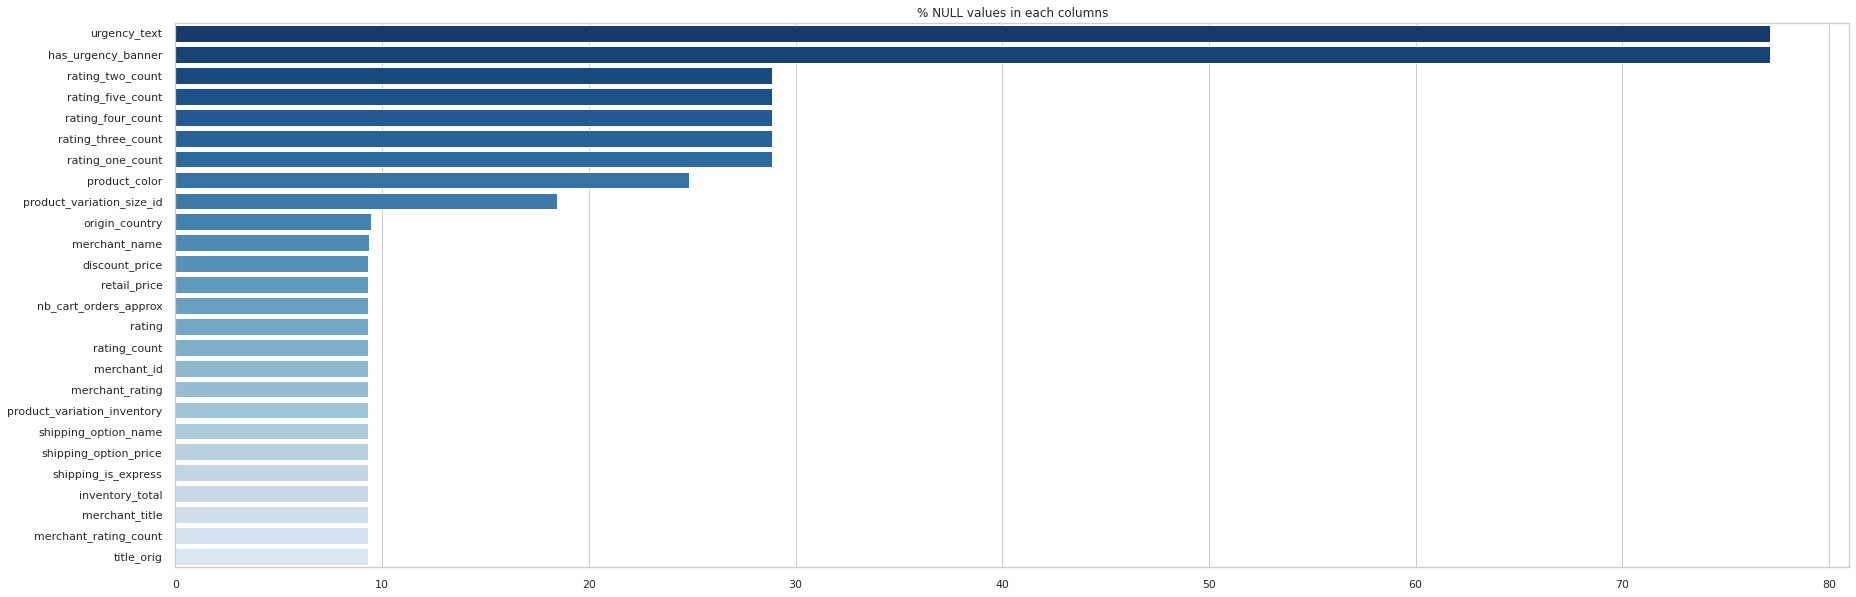

In [ ]:
missing_data(summer)

**Product_color**: fill NaN into Others

In [ ]:
summer['product_color'].fillna(value = 'Others', inplace = True)

**Product_variation_size_id** : fill NaN into Others

In [ ]:
summer['product_variation_size_id'].fillna(value='Others', inplace = True)

**Origin_country** : fill NaN into Others

In [ ]:
summer['origin_country'].fillna(value='Others', inplace = True)

**Rating_count**

In [ ]:
rating_count_columns = ['rating_one_count', 'rating_two_count','rating_three_count', 
                        'rating_four_count','rating_five_count']

In [ ]:
summer[rating_count_columns] = summer[rating_count_columns].fillna(value=0)

**Urgency banner**

In [ ]:
summer['has_urgency_banner'].fillna(value = 'False', inplace=True)

In [ ]:
summer['urgency_text'].fillna(value = 'No text', inplace=True)

**Drop the rest of Nan**

Because 667 products have all nan values

In [ ]:
summer.dropna(axis=0, inplace=True)

### Drop duplicated

In [ ]:
summer.drop_duplicates(inplace=True)

### Detect oulier

In [ ]:
summer.describe()

,discount_price,retail_price,nb_cart_orders_approx,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_variation_inventory,shipping_option_price,inventory_total,merchant_rating_count,merchant_rating
count,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6.456000e+03,6456.000000
mean,33.878405,56.545700,1440.703686,3.115882,323.815830,166.063352,61.515025,42.309944,19.802509,34.125000,35.527571,4.915804,47.823265,1.678512e+04,4.068378
std,360.877998,377.977293,5304.924815,1.705432,1121.215819,569.640489,217.514395,163.605397,79.581237,125.736135,20.652002,4.166194,9.132719,7.640996e+04,0.478993
min,0.720000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,7.000000,8.000000,10.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,50.000000,5.880000e+02,3.938250
50%,11.000000,15.000000,10.000000,3.851393,33.000000,18.000000,6.000000,3.000000,1.000000,3.000000,50.000000,3.000000,50.000000,2.516500e+03,4.115646
75%,19.000000,37.000000,1000.000000,4.226387,193.250000,101.000000,35.000000,22.000000,10.000000,19.000000,50.000000,6.000000,50.000000,1.093000e+04,4.269922
max,12256.000000,12256.000000,100000.000000,5.000000,26052.000000,13885.000000,4618.000000,3755.000000,2041.000000,2768.000000,50.000000,80.000000,50.000000,3.464509e+06,5.000000


#### Discount price & retail_price

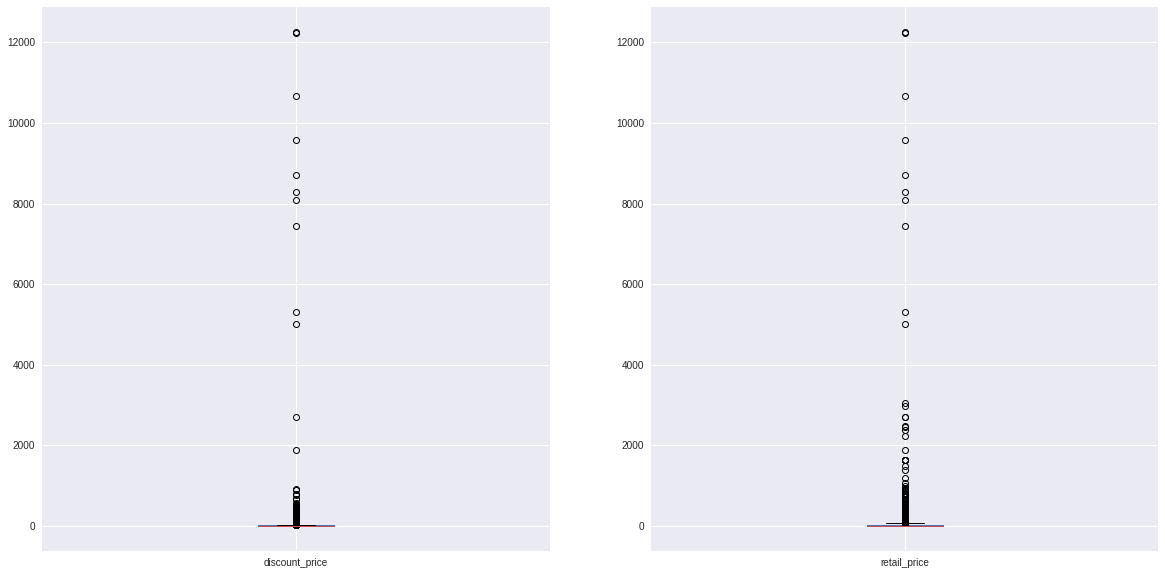

In [ ]:
# Visualize with boxplot
plt.subplots(2,3, figsize=(20,10))

plt.subplot(121)
summer['discount_price'].plot(kind='box')

plt.subplot(122)
summer['retail_price'].plot(kind='box')

plt.show()

In [ ]:
summer.head()

,title_orig,discount_price,retail_price,nb_cart_orders_approx,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id
0,Simple Summer Beach Vacation Multilayer 925 St...,3.11,4.0,5000.0,4.020408,539.0,303.0,92.0,57.0,26.0,61.0,white,Others,50.0,Livraison standard,1.0,False,50.0,False,No text,CN,Angol,angol,74181.0,4.476591,5a4f21f26ecee00df04a6d3c,5d25b24efc082072e2af3471
1,Bendis Women's Pattaya Lovely Long Summer Dres...,42.00,42.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,red,free,2.0,Livraison standard,17.0,False,2.0,False,No text,KR,atcmart,atcmart,6.0,3.833333,5fe2119d5265268f81dec682,5ff3dde8c34b780048c7b0b9
2,2021 New Summer Men's Polos Shirt Summer Fashi...,4.79,44.0,1000.0,3.571429,42.0,16.0,9.0,5.0,7.0,5.0,grey&white,3xs,1.0,Livraison standard,1.0,False,50.0,False,No text,US,DDFGb,ddfgb,157.0,4.006369,5e695b405c6818fdeccfad33,600687ecc9d71b0318749e95
3,5 Colors Fashion Women Sleeveless Lace Tops Se...,5.00,5.0,10000.0,3.906273,1355.0,648.0,285.0,197.0,97.0,128.0,grey,s,50.0,Livraison standard,2.0,False,50.0,False,No text,CN,Adrea boutique,adreaboutique,15616.0,4.063140,55f7c64b3a698c4749f3bccf,5bebc4a90269f2172b1af950
4,XS-8XL Plus Size Fashion Clothes Women's Dress...,4.69,5.0,1000.0,3.505495,273.0,103.0,54.0,46.0,18.0,52.0,yellow,xs,3.0,Livraison standard,1.0,False,50.0,False,No text,CN,mynewsoul,mynewsoul,2034.0,4.002950,580f361ff6978b4fdba4b112,5e0450861f26761e566fee35


## Data engineering

In [ ]:
summer['nb_cart_orders_approx'] = summer['nb_cart_orders_approx'].apply(lambda x: 100 if x <= 100 else x)

In [ ]:
colour_data = {
       'white&blue': 'blue', 'tiffanyblue': 'blue', 'red&blue': 'blue', 'darkblue': 'blue', 'blue&stripe': 'blue',
       'royalblue': 'blue', 'seablue': 'blue', 'cyan&blue': 'blue',
       'oceanblue': 'blue', 'bone&blue': 'blue', 'aquablue': 'blue', 
       'bluesapphire': 'blue', 'turquoiseblue': 'blue', 'sailorblue': 'blue',
       'transparent&blue': 'blue', 'blackblue': 'blue',
       'whiteblue': 'blue',  'lakeblue' : 'blue',
       'navyblue&white': 'blue', 'bluecellular': 'blue', 'bluesky': 'blue',
        'blue&multicolor': 'blue',
       'denimblue': 'blue', 'deepblue': 'blue', 'angelblue': 'blue', 'blue-green': 'blue',
      'bluepenguin': 'blue', 'bluewash': 'blue', 'sapphireblue': 'blue',
        'brightblue': 'blue', 'aquaticblue': 'blue',
       'glacierblue': 'blue', 'tealblue': 'blue', 'navyblue/yellow': 'blue',
       'blueplaid': 'blue', 'peacockblue': 'blue', 
       'babyblue': 'blue', 'multicolor&blue': 'blue',
       'metallicpiping/bluefilter': 'blue',
       'alaskablue': 'blue', 'gray&blue-green': 'blue', 'bluestripe': 'blue',
       'beigelightblue': 'blue', 'queenblue': 'blue', 'bluediamond': 'blue', 'alaskanblue': 'blue',
       'bluecar': 'blue', 'bellflowerblue': 'blue', 'bluegreen': 'blue', 'lightskyblue': 'blue',
       'bluesilver': 'blue', 'bluestars': 'blue', 'bluegray': 'blue', 'blue&pink': 'blue',
       'darkslateblue': 'blue', 'prussianblue': 'blue', 
       'grayblue': 'blue', 'blueberry': 'blue', 'acidblue': 'blue',
    

       'armygreen':'green', 'lightgreen':'green', 'blue&green':'green', 'green&blue':'green',
       'yellow&green':'green', 'silver&green':'green', 'militarygreen':'green', 'darkgreen':'green',
       'grassgreen':'green', 'clovergreen':'green', 'limegreen':'green', 'tealgreen':'green', 'mintgreen':'green',
       'camouflagegreen':'green','armygreen&camouflage':'green',
       'camouflage&armygreen':'green', 'greenbottle':'green', 'lakegreen':'green', 'brightgreen':'green',
       'green&grey':'green', 'olivegreen':'green', 'green&green':'green', 'springgreen':'green',
       'coolblack&green':'green', 'kellygreen':'green', 'green&rosered':'green',
       'reflectivegreen/concrete':'green', 'oasisgreen':'green',
       'green/white':'green', 'acidgreen':'green', 'greencamo':'green', 'hotpink&green':'green',
       'applegreen':'green', 'pink&green&blue':'green', 'grey&green':'green',
       'black&lightgreen':'green', 'turquoisegreen':'green', 'gray&blue-green':'green',
       'darkarmygreen':'green', 'bluegreen':'green', 'charlestongreen':'green', 'purple&green':'green',
       'green&purple':'green', 'fluorescentgreen':'green', 'green&red':'green', 'green&white':'green',
       'green&brick':'green', 'sweetgreen/black':'green', 'green&silver':'green', 'bottlegreen':'green',
       'forestgreen':'green', 'blue-green&red':'green', 'neongreen':'green', 'camogreen':'green',


       'orange&yellow':'yellow', 'blue&yellow':'yellow', 'yellow&pink':'yellow',
       'black&yellow':'yellow', 'yellow&green':'yellow', 'yellowgold':'yellow', 'lightyellow':'yellow',
       'gold&yellow':'yellow', 'bananayellow':'yellow', 'yellowcamouflage':'yellow',
       'darkyellow':'yellow', 'yellow/white':'yellow', 'yellow/gold':'yellow',
       'white&yellow':'yellow', 'navyblue/yellow':'yellow', 'goldenyellow':'yellow',
       'fluorescentyellow':'yellow', 'grey&yellow':'yellow', 'green&yellow':'yellow', 'bronzeyellow':'yellow',
       'darkblue&yellow':'yellow', 'winered&yellow':'yellow', 'yellow&grey':'yellow', 'pink&yellow':'yellow',
       'earthyellow':'yellow', 'white/yellow':'yellow',

       'rosered':'red', 'multicolored':'red', 'winered':'red', 'red&blue':'red',
       'red&black':'red', 'watermelonred':'red', 'darkred':'red', 'rubyred':'red', 'red&pink':'red',
       'silver&red':'red', 'garnetred':'red', 'bordeauxred':'red', 'black&red':'red', 'mattered':'red',
       'brickred':'red', 'red&white':'red', 'blue&red':'red', 'gold&red':'red', 'red&gold':'red',
       'navy&red':'red', 'rose&red':'red', 'redplaid':'red',
       'red&red':'red', 'black/red':'red', 'red&grey':'red', 'navyblue&red':'red', 'redblack':'red',
       'black&rosered':'red', 'redwhite':'red', 'red&green':'red', 'yellow&red':'red',
       'tangored':'red', 'floral&red':'red',
       'metallicred':'red', 'leopardprint&red':'red', 'barnred':'red', 'brightred':'red',
       'vintagered':'red', 'purplishred':'red', 'carminered/black':'red', 'lightred':'red',
       'grey&red':'red', 'blackredassorted':'red', 'red&flame':'red', 'darkgray&red':'red',
       'blackred':'red', 'purple&red':'red', 'redhot':'red', 'darkblue&rosered':'red', 'redwood':'red',
       'redpunch':'red', 'graphicblackred':'red', 'red&wine':'red', 'brown&red':'red',
       'winered&yellow':'red', 'cardinalred':'red',
       'burgundysunsetheatheredrugbystripe':'red', 'red&khaki':'red', 'red&darkblue':'red',
       'green&red':'red', 'deepred':'red', 'redorange':'red', 'blue-green&red':'red', 'glossyred':'red',
       'whitered':'red', 'red/chrome':'red',

       'darkgrey': 'grey', 'butterfly&grey': 'grey', 'blue&grey': 'grey', 'lightgrey': 'grey',
       'silvergrey': 'grey', 'navygrey': 'grey', 'blackgrey': 'grey',
       'greysnakeskinprint': 'grey', 
       'heathergrey': 'grey', 'sportgrey': 'grey', 'grey&white': 'grey', 'black&darkgrey': 'grey',
       'grey&orange': 'grey', 'darkgrey&red': 'grey', 'rose/grey': 'grey', 'lightgrey&black': 'grey',
       'grey&camouflage': 'grey',
       'grey&green': 'grey', 'icegrey': 'grey','purple&grey': 'grey', 'coolgrey': 'grey',

        'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
        'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
        'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
        'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'}


def update_color(col):
    if colour_data.get(col, False):
        return colour_data.get(col)
    elif '&' in col:
        return 'dual'
    elif col in colour_data.values():
        return col
    else:
        return 'other'

summer['product_color'] =  summer['product_color'].apply(update_color)

In [ ]:
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('2xl', 'xl')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('3xl', 'xl')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('4xl', 'xl')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('5xl', 'xl')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('6xl', 'xl')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('x   l', 'xl')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('sizel', 'l')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('size4xl', 'xl')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('x   l', 'xl')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('1 pc - xl', 'xl')

def size_change(size):
    if size in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return size
    else:
        return 'Other'

summer['product_variation_size_id'] = summer['product_variation_size_id'].apply(size_change)

In [ ]:
def origin_country(country):
    if country in 'CN, CA, US, KR, GB, PL, CZ, VN, VE, TR, DE, ES, NL , FR, SG, IT, TH, AU, PE, PH':
        return country
    else:
        return 'Other'

In [ ]:
summer['origin_country'] = summer['origin_country'].apply(origin_country)

In [ ]:
summer['nb_cart_orders_approx'].value_counts()

100.0       4403
1000.0      1358
5000.0       328
10000.0      224
20000.0      114
50000.0       23
100000.0       6
Name: nb_cart_orders_approx, dtype: int64

## Correlation

In [ ]:
corr_matrix = summer.corr()

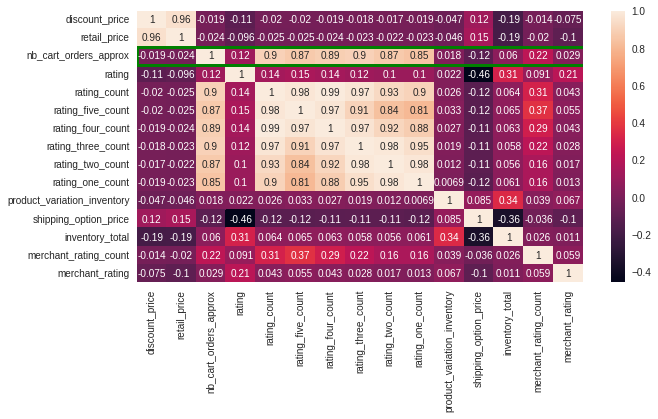

In [ ]:
corr_matrix = summer.corr()
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr_matrix,
            annot=True,
            ax=ax)
ax.add_patch(plt.Rectangle((0,2),31,1, 
                           fill = False, 
                           edgecolor = 'green', 
                           lw = 3))
plt.show()

## Interesting insight of dataset

In [ ]:
df = summer.copy()

### How does price effect on the units sold?

Retail price is known as the regular price or the price before discount.

In [ ]:
price_and_units_sold = df.groupby('nb_cart_orders_approx').agg(['mean'])[['retail_price','discount_price']]

In [ ]:
price_and_units_sold

,retail_price,discount_price
,mean,mean
nb_cart_orders_approx,,
100.0,70.999023,45.532539
1000.0,27.856745,9.157916
5000.0,19.137195,7.660427
10000.0,22.526250,9.133393
20000.0,24.719298,8.820614
50000.0,18.565217,8.471739
100000.0,8.833333,7.310000


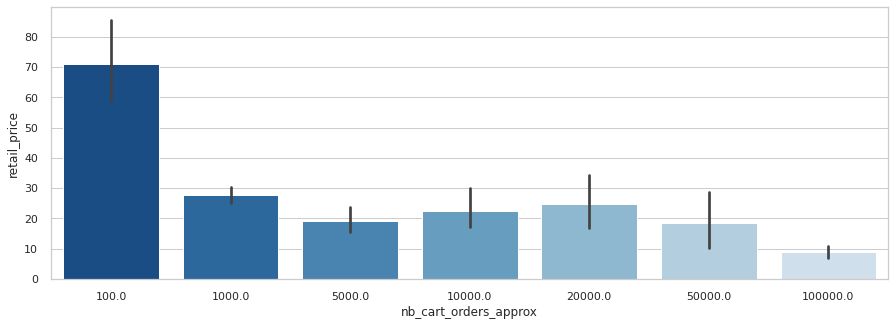

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors =8)
palette.reverse()

sns.barplot(data=df, x='nb_cart_orders_approx', y='retail_price', palette=palette)

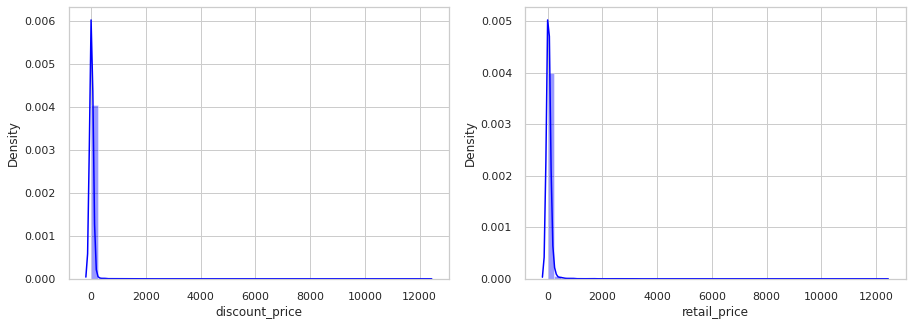

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 2)

plt.subplot(121)
sns.distplot(df['discount_price'],color= 'Blue')

plt.subplot(122)
sns.distplot(df['retail_price'], color= 'Blue')

plt.show()

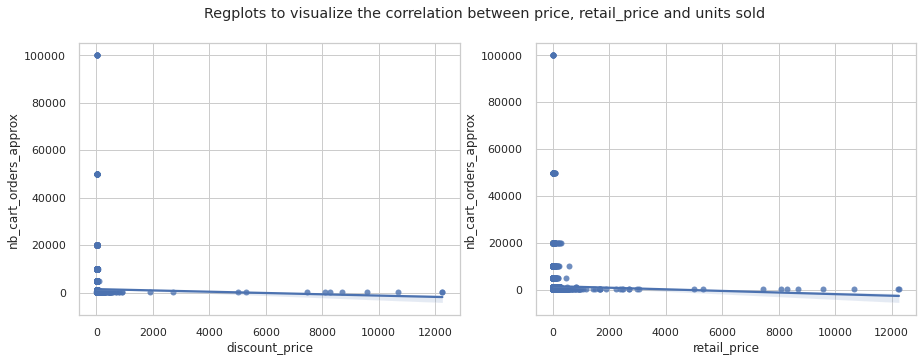

In [ ]:
# Let's check our thesis with some visualisation
features = df.copy()[['discount_price', 'retail_price']]
quanti = df.copy()['nb_cart_orders_approx']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
plt.suptitle("Regplots to visualize the correlation between price, retail_price and units sold")

# Using regplot to plot data
sns.regplot(data=df,
            x=features['discount_price'],y=quanti, ax = ax1)
sns.regplot(data=df,
            x=features['retail_price'],y=quanti, ax = ax2)

plt.show()

So does promotion affect sales volume?

In [ ]:
df['sales_price'] = df['retail_price'] - df['discount_price']

Text(0.5, 1.0, 'Sales price vs Unit sold')

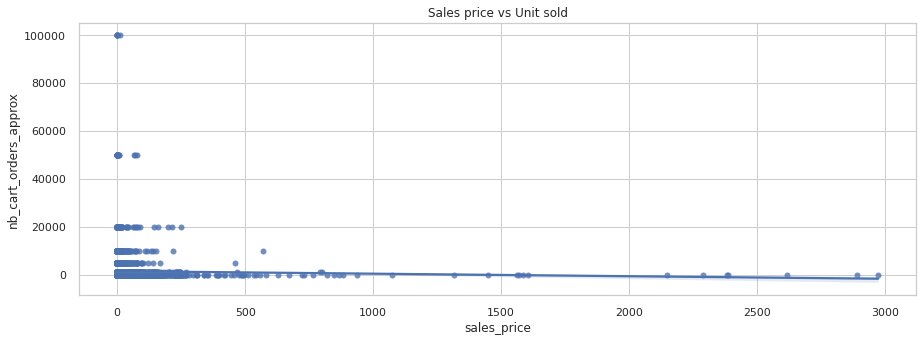

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 2)

sns.regplot(data = df,
            x = 'sales_price',
            y = 'nb_cart_orders_approx')
plt.title('Sales price vs Unit sold')

In [ ]:
df[df['discount_price'] == df['retail_price']]['title_orig'][:10].sort_values(ascending=False)

25    XS-8XL Plus Size Fashion Dresses Summer Clothe...
19    Women's Sexy Chiffon Mini Dress Summer Halter ...
11    Women's Fashion Loose Blouse Pure Color Slopin...
20    Summer Women Boho Maxi Polka Dot Dress Irregul...
10    Short-Sleeve Unisex T-Shirt, Summer T-Shirt,Co...
17    SHEIN Tie Front Heather Rib-knit Tank Romper W...
27    Plus Size Women's Fashion Loose Casual Floral ...
21     Dress Average  Summer pink black Fashion Born2Be
1     Bendis Women's Pattaya Lovely Long Summer Dres...
3     5 Colors Fashion Women Sleeveless Lace Tops Se...
Name: title_orig, dtype: object

In [ ]:
df[df['sales_price'] < 1000]

,title_orig,discount_price,retail_price,nb_cart_orders_approx,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id,sales_price,gap_price
0,Simple Summer Beach Vacation Multilayer 925 St...,3.11,4.0,5000.0,4.020408,539.0,303.0,92.0,57.0,26.0,61.0,white,Other,50.0,Livraison standard,1.0,False,50.0,False,No text,CN,Angol,angol,74181.0,4.476591,5a4f21f26ecee00df04a6d3c,5d25b24efc082072e2af3471,0.89,22.3
1,Bendis Women's Pattaya Lovely Long Summer Dres...,42.00,42.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,red,Other,2.0,Livraison standard,17.0,False,2.0,False,No text,KR,atcmart,atcmart,6.0,3.833333,5fe2119d5265268f81dec682,5ff3dde8c34b780048c7b0b9,0.00,0.0
2,2021 New Summer Men's Polos Shirt Summer Fashi...,4.79,44.0,1000.0,3.571429,42.0,16.0,9.0,5.0,7.0,5.0,grey,Other,1.0,Livraison standard,1.0,False,50.0,False,No text,US,DDFGb,ddfgb,157.0,4.006369,5e695b405c6818fdeccfad33,600687ecc9d71b0318749e95,39.21,89.1
3,5 Colors Fashion Women Sleeveless Lace Tops Se...,5.00,5.0,10000.0,3.906273,1355.0,648.0,285.0,197.0,97.0,128.0,grey,s,50.0,Livraison standard,2.0,False,50.0,False,No text,CN,Adrea boutique,adreaboutique,15616.0,4.063140,55f7c64b3a698c4749f3bccf,5bebc4a90269f2172b1af950,0.00,0.0
4,XS-8XL Plus Size Fashion Clothes Women's Dress...,4.69,5.0,1000.0,3.505495,273.0,103.0,54.0,46.0,18.0,52.0,yellow,xs,3.0,Livraison standard,1.0,False,50.0,False,No text,CN,mynewsoul,mynewsoul,2034.0,4.002950,580f361ff6978b4fdba4b112,5e0450861f26761e566fee35,0.31,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,2 Pcs Skeleton Fish Bones Vinyl Decal Sticker ...,3.13,4.0,1000.0,4.379747,237.0,153.0,51.0,17.0,2.0,14.0,other,Other,50.0,Livraison standard,1.0,False,50.0,False,No text,CN,Alistore98,alistore98,7616.0,4.415835,572b601f3a698c7745de4585,5b7546947785b41dbd5ca0df,0.87,21.8
893,Newest Fashion U-Boat Top Quality Watch Luxury...,14.00,14.0,100.0,3.733333,15.0,6.0,4.0,2.0,1.0,2.0,black,Other,2.0,Livraison standard,5.0,False,50.0,False,No text,CN,ychajsdg,ychajsdg,220.0,2.718182,5f069015d0e5b712a6b0283a,5fb5e6c4307f9711fdb37c08,0.00,0.0
894,"10000W 2*5000w [For RV,Boat Cabin Home House C...",28.00,28.0,100.0,3.250000,40.0,14.0,6.0,6.0,4.0,10.0,other,Other,50.0,Livraison standard,8.0,False,50.0,False,No text,CN,mikiefse,mikiefse,1480.0,3.810811,57dff852c8f952104229121c,5fb21e5d23b65f64018a105d,0.00,0.0
896,9.5in Boat Fender Rack Double Foldable Inflata...,69.00,69.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,other,Other,50.0,Livraison standard,12.0,False,50.0,False,No text,CN,Bewestern,bewestern,378.0,4.261905,5d5cfdd4560eca06520bcfd3,60409d33b65dc905fee47f52,0.00,0.0


In [ ]:
df[df['sales_price'] > 1000]

,title_orig,discount_price,retail_price,nb_cart_orders_approx,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id,sales_price,gap_price
278,2020 4G 5G Mobile Phone New Fingerprint Unlock...,43.0,1650.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,blue,Other,3.0,Livraison standard,12.0,False,50.0,False,No text,US,doodsble,doodsble,135.0,2.362963,5fd2d30d518a8f1ad03ae683,601910954ebbcd48ded67c56,1607.0,97.4
391,Christmas present 2020 New 6.6 Inch 4G/5G Smar...,64.0,1648.0,100.0,2.916667,12.0,2.0,2.0,4.0,1.0,3.0,white,Other,50.0,Livraison Express,19.0,True,50.0,False,No text,CN,Sell by Barbie,sellbybarbie,99.0,3.545455,5d610a4240defd7d5e8882fe,5fbf77f57c0a49ec6ba21fe1,1584.0,96.1
321,2021 New Galaxy S20+ Pro Fashion 7.2Inch Full ...,77.0,1640.0,100.0,3.218750,32.0,12.0,6.0,1.0,3.0,10.0,green,Other,50.0,Livraison Express,18.0,True,50.0,False,No text,Other,Junctionshop,junctionshop,27.0,3.629630,5f903696fb65088d231e8c7d,5ff7fb39ba53c3a1a190ba6f,1563.0,95.3
369,2021 New Listing Galaxy S21+ Ultra 4G 5G 7.2In...,76.0,2969.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,black,Other,50.0,Livraison standard,12.0,False,50.0,False,No text,GB,Etdrmmeliv,etdrmmeliv,0.0,0.000000,5fdca12ce0d64670eb8dde29,6048770c102010f32452a5de,2893.0,97.4
406,2021 Fashion New Handy Smartphone HAUWEI P50 P...,77.0,3051.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,blue,Other,4.0,Livraison standard,12.0,False,50.0,True,Quantité limitée !,Other,dechousory,dechousory,0.0,0.000000,5fd86e86eea8502032d85239,6062875e002f7b464eb74bad,2974.0,97.5
449,2021 Hot sale S21+ Ultra fashion 7.2 Inch Full...,76.0,2694.0,100.0,3.312500,32.0,14.0,3.0,4.0,1.0,10.0,black,Other,50.0,Livraison standard,12.0,False,50.0,False,No text,CA,Quonvuhavas,quonvuhavas,17.0,3.470588,5fd86540ce3d5a14db09410c,602e1b65c659d8a727622a65,2618.0,97.2
466,2021 (Brand New) S21+ Ultra 4G 5G 7.2Inch HD S...,79.0,2227.0,100.0,3.100000,10.0,3.0,2.0,1.0,1.0,3.0,black,Other,50.0,Livraison standard,12.0,False,50.0,False,No text,PH,ujhgdc,ujhgdc,4.0,4.000000,5e3bcdfcd5b0df1d232b093c,603f4048bf117efdddb4f13c,2148.0,96.5
532,2021 New Listing S21+ Ultra 4G 5G 7.2Inch HD S...,76.0,2458.0,100.0,5.000000,1.0,1.0,0.0,0.0,0.0,0.0,black,Other,50.0,Livraison standard,12.0,False,50.0,True,Quantité limitée !,DE,Superiamino,superiamino,1.0,5.000000,5fdca7fd57073e77ff37589a,6048623a08674cc16ab3cfe3,2382.0,96.9
533,2021 New 6.9-inch Large-screen Ultra-thin True...,95.0,2383.0,100.0,3.833333,6.0,3.0,1.0,1.0,0.0,1.0,white,Other,50.0,Livraison Express,19.0,True,50.0,False,No text,CN,hjx6546,hjx6546,106.0,3.603774,5da9972d567fca1a0622d5aa,5fd1a523b15ef296d2580d5b,2288.0,96.0
534,KKmoon 2021 NEW Professional MD-5030 Metal Det...,77.0,1649.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,other,Other,1.0,Livraison Express,12.0,True,2.0,False,No text,US,Spooky Way,repeat_store,2.0,4.000000,5e7401a6c50ae806053304bc,5f9bc118ac38f70a84f85387,1572.0,95.3


- Clothes category usually has the retail_price == discount_price.
- Smart phone category usually has a big discount which is discount more than 50%.


In [ ]:
df[['sales_price','nb_cart_orders_approx']]

- The lower **discount_price** and **retail_price**, the more units sold
- Products with high units_sold are usually concentrated in the **discount_price** range of 0-1000.
- Products with high units_sold are usually concentrated in the **retail_price** range of 0-2000.
=> This might because the merchant wants to clear the stock, or is trying to attract consumers by offering few products by selling them with lower price and there can be many more reasons.
- **Sales price** is not the element lead to success in Wish.


In [ ]:
df[['retail_price', 'nb_cart_orders_approx']].describe()

In [ ]:
df['gap_price'] = np.abs(round((df['sales_price']) / df['retail_price'] * 100, 1))

In [ ]:
gap_price_of_unit_sold = round(df.groupby('nb_cart_orders_approx')['gap_price'].mean(), 1)
price_of_unit_sold = round(df.groupby('nb_cart_orders_approx')['discount_price'].mean(), 1)
units_sold_order = ['0-100', '1000', '5000', '10000', '20000', '50000', '100000']

Text(0.5, 1.0, 'The reltionship between Gap Price vs Unit sold')

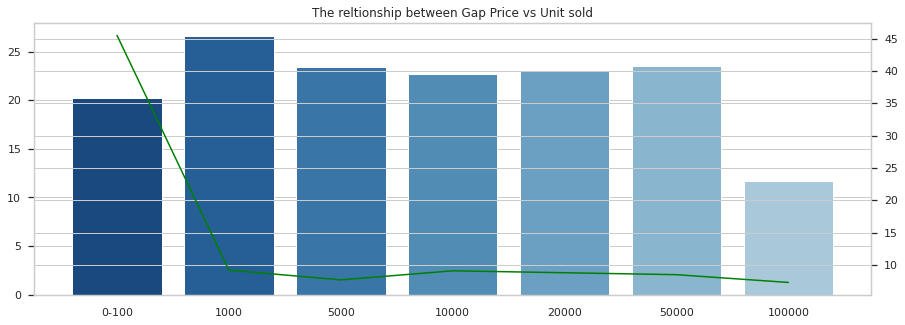

In [ ]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 10)
palette.reverse()

fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = units_sold_order, y = gap_price_of_unit_sold.values, palette = palette, ax = ax)

ax2 = ax.twinx()
ax2.plot(units_sold_order, price_of_unit_sold.values, color = 'green')
plt.title('The reltionship between Gap Price vs Unit sold')

### Deep dive cart has more than 100000 nb cart orders approx

In [ ]:
a = df[df['nb_cart_orders_approx'] == 100000]

In [ ]:
a[a['retail_price'] == a['discount_price']][['nb_cart_orders_approx']].count()/a.shape[0]

In [ ]:
df[df['nb_cart_orders_approx'] >= 10000]

- In range 50000-100000 cart orders, the product has no discount take up 66%.

### The top buyer is woman

In [ ]:
men_title  = round(df.title_orig.str.count("Men").sum()/len(df)*100, 3)
women_title = round(df.title_orig.str.count("Women").sum()/len(df)*100, 3) 

In [ ]:
men_title

12.825

In [ ]:
women_title

61.695

### What kind of merchants is likely to gain product success?


In [ ]:
high_sold = df.groupby('merchant_name')['nb_cart_orders_approx'].sum().sort_values(ascending = False).reset_index()[:5]
high_sold 

,merchant_name,nb_cart_orders_approx
0,onlinetechnologycoltd,222000.0
1,fashionstore0408,200000.0
2,hotdress,116000.0
3,mermaidskiss,114100.0
4,kikifashion,110000.0


In [ ]:
df['rating_4_and_5'] = df['rating_five_count'] + df['rating_four_count']

In [ ]:
df['rating_4_and_5'].sum()/df['rating_count'].sum()

0.7028018875370416

In [ ]:
high_rating = df.groupby('merchant_name')['rating_4_and_5'].sum().sort_values(ascending = False).reset_index()[:5]

In [ ]:
high_rating

,merchant_name,rating_4_and_5
0,simplevalueltd,29747.0
1,mermaidskiss,26563.0
2,fashionstore0408,20967.0
3,frome,20566.0
4,onlinetechnologycoltd,20364.0


### Is there any correlation between units sold and ratings?

In [ ]:
mean_rating_between_unitsold_and_rating = df.groupby('nb_cart_orders_approx').agg(['count', 'mean'])['rating']

In [ ]:
mean_rating_between_unitsold_and_rating

,count,mean
nb_cart_orders_approx,,
100.0,4403,2.738103
1000.0,1358,3.930965
5000.0,328,3.914878
10000.0,224,3.942835
20000.0,114,3.875687
50000.0,23,3.920044
100000.0,6,3.791883


Text(0.5, 1.0, 'Relation between units_sold and ratings')

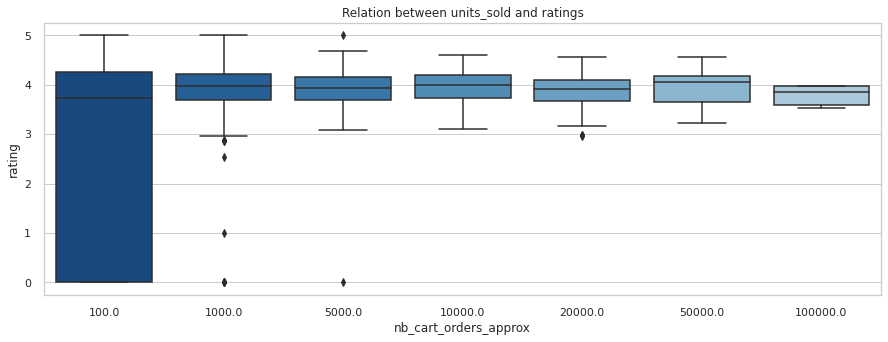

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 10)
palette.reverse()

sns.boxplot(data = df,x = 'nb_cart_orders_approx', y= 'rating',palette =palette )
plt.title('Relation between units_sold and ratings')

In [ ]:
df[df['nb_cart_orders_approx'] == 100]['merchant_rating']

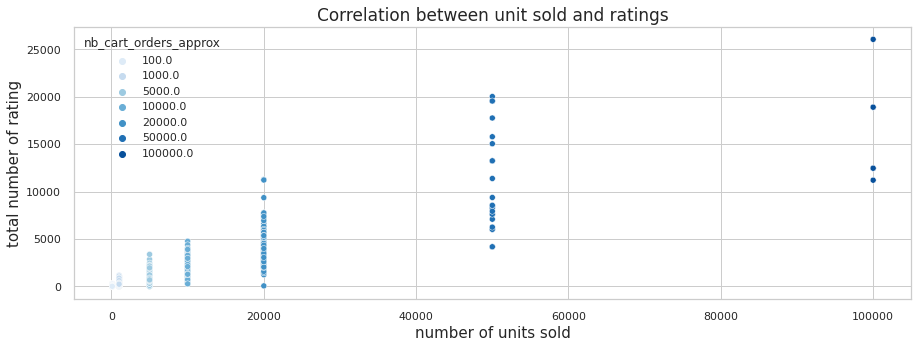

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 7)
# palette.reverse()

sns.scatterplot(x='nb_cart_orders_approx', y='rating_count', hue='nb_cart_orders_approx', 
              palette= palette,data=df)
plt.xlabel("number of units sold", fontsize=15)
plt.ylabel("total number of rating", fontsize=15)
plt.title("Correlation between unit sold and ratings", fontsize=17)
plt.show()

It's possible that the reason there are so few values in the range of more than 50k units sold compared to other range categories is that buyers haven't supplied their ratings. However, because ratings 4 and 5 account for more than half of the chart, it is reasonable to assume that the higher the rating, the better the product sells.

### How does shipping affect sales?

In [ ]:
shipping_columns = list(df.loc[:,df.columns.str.contains('shipping')].columns)

In [ ]:
shipping_and_sales = df.groupby('nb_cart_orders_approx')['shipping_option_price'].agg(['mean','sum']).reset_index()

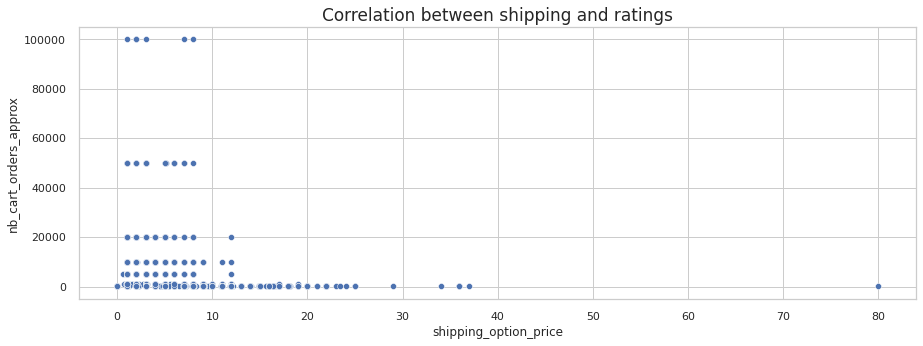

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 10)
palette.reverse()

plt.title("Correlation between shipping and ratings", fontsize=17)
sns.scatterplot(data = df, x = 'shipping_option_price', y = 'nb_cart_orders_approx', palette = palette)

Text(0.5, 0, 'Total number of cart orders')

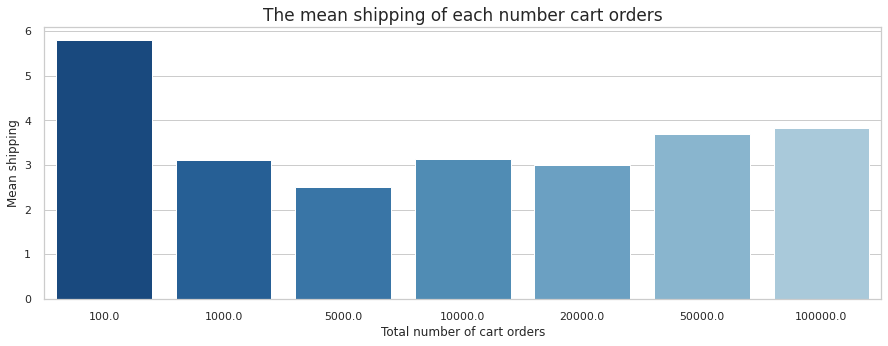

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 10)
palette.reverse()

plt.title("The mean shipping of each number cart orders", fontsize=17)
sns.barplot(data=shipping_and_sales,  y='mean', x= 'nb_cart_orders_approx', palette = palette)
plt.ylabel("Mean shipping", fontsize=12)
plt.xlabel("Total number of cart orders", fontsize=12)

Customers prefer the less shipping fee and the range of shipping from 0 to 20 EUR.

### Does seller location affect sales?

In [ ]:
df['origin_country'].value_counts()

CN       4945
CA        646
US        370
KR        146
GB         91
PL         61
VN         45
Other      29
VE         27
TR         25
ES         12
NL         12
DE         11
AU          8
TH          6
SG          6
PE          5
FR          5
IT          4
PH          2
Name: origin_country, dtype: int64

Wish is known as a site selling cheap products from China, with shipping being more affordable than within the US.

In [ ]:
df.groupby('nb_cart_orders_approx')['origin_country'].count().reset_index()

,nb_cart_orders_approx,origin_country
0,100.0,4403
1,1000.0,1358
2,5000.0,328
3,10000.0,224
4,20000.0,114
5,50000.0,23
6,100000.0,6


In [ ]:
origin_country_and_cart = df.groupby('origin_country')['nb_cart_orders_approx'].sum().sort_values(ascending=False).reset_index()

In [ ]:
origin_country_and_cart 

,origin_country,nb_cart_orders_approx
0,CN,9324000.0
1,US,169300.0
2,CA,65500.0
3,SG,44000.0
4,Other,22200.0
5,GB,20800.0
6,VE,15700.0
7,KR,14600.0
8,TH,11400.0
9,PL,6100.0


In [ ]:
df[df['origin_country'] == 'CN']['shipping_option_price'].mean()

3.9861658240647118

In [ ]:
df[df['origin_country'] == 'US']['shipping_option_price'].mean()

4.670513513513513

In [ ]:
df[df['origin_country'] == 'CA']['shipping_option_price'].mean()

8.38390092879257

In [ ]:
df[df['origin_country'] == 'SG']['shipping_option_price'].mean()

2.0

In [ ]:
df[df['origin_country'] == 'CN']['shipping_option_name'].value_counts()

Livraison standard    4383
Livraison Express      562
Name: shipping_option_name, dtype: int64

- The most seller of Wish from China and the shipping type 'Livraison standard' might the type of Global Shipping
- 3 countries CN, US and CA take over more than 98%
- China has a lower ship price than domestic US and Canada shipping.

### Do ugency banner help the merchant gain product success?

In [ ]:
df.groupby('has_urgency_banner')['nb_cart_orders_approx'].count()

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 4)
palette.reverse()

sns.barplot(data = df,x ='has_urgency_banner' , y= 'nb_cart_orders_approx',palette =palette)

### What about the details of the merchant? 

In [ ]:
merchant_features  = df[list(df.loc[:,df.columns.str.contains('merchant')].columns)]

In [ ]:
merchant_features.describe()

### Does rating affects the success of the merchant?

In [ ]:
units_sold = df['nb_cart_orders_approx'].unique().tolist()
units_sold_and_ratings = df.groupby('nb_cart_orders_approx').agg({'rating_five_count': 'sum',
                                                                         'rating_four_count': 'sum',
                                                                         'rating_three_count': 'sum',
                                                                         'rating_two_count': 'sum',
                                                                         'rating_one_count': 'sum'})
units_sold_and_ratings.reset_index()
units_sold_and_ratings = units_sold_and_ratings.iloc[1:]
units_sold_and_ratings

The customer have tendency watching the review before buying.

### What is the price difference between countries?

In [ ]:
origin_country_price = df.groupby('origin_country')[['retail_price']].agg('mean').sort_values(ascending=False, by= 'retail_price').reset_index().head()

In [ ]:
origin_country_price

,origin_country,retail_price
0,PH,1118.500000
1,DE,245.181818
2,Other,210.448276
3,CA,178.815789
4,FR,173.000000


In [ ]:
low_price_country = df.groupby('origin_country')[['retail_price']].agg('mean').sort_values(ascending=True, by= 'retail_price').reset_index().head()

In [ ]:
low_price_country['retail_price'].sort_values(ascending=False)

4    32.622951
3    30.760000
2    28.155556
1    21.629630
0     6.000000
Name: retail_price, dtype: float64

Text(0.5, 0, 'Country')

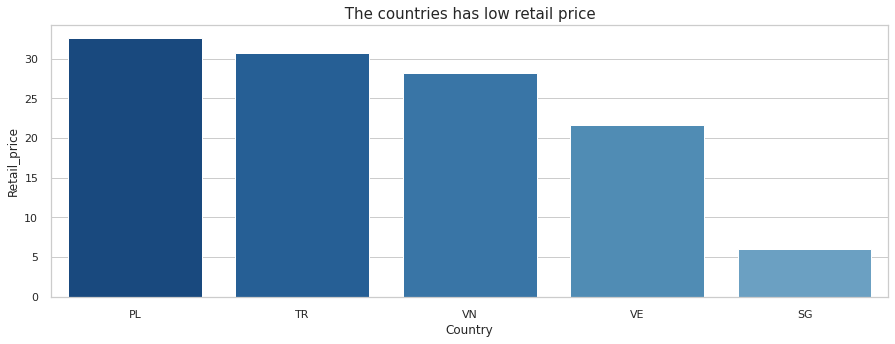

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 10)
palette.reverse()

order= low_price_country.groupby('origin_country')['retail_price'].mean().sort_values(ascending=False).index
plt.title(" The countries has low retail price ", fontsize=15)
sns.barplot(data=low_price_country,  y='retail_price', x= 'origin_country', palette = palette, order =order)
plt.ylabel("Retail_price", fontsize=12)
plt.xlabel("Country", fontsize=12)

In [ ]:
price_btw_countries = df.groupby('origin_country')[['retail_price', 'nb_cart_orders_approx']].agg({'retail_price':'mean','nb_cart_orders_approx':'sum'}).sort_values(ascending=False, by= 'retail_price').reset_index().head(5)

In [ ]:
price_btw_countries

,origin_country,retail_price,nb_cart_orders_approx
0,PH,1118.500000,200.0
1,DE,245.181818,1100.0
2,Other,210.448276,22200.0
3,CA,178.815789,65500.0
4,FR,173.000000,500.0


In [ ]:
df[df['origin_country'] == 'CA']

,title_orig,discount_price,retail_price,nb_cart_orders_approx,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id,sales_price,gap_price,rating_4_and_5
17,SHEIN Tie Front Heather Rib-knit Tank Romper W...,24.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,xs,21.0,Livraison standard,8.0,False,50.0,False,No text,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,60119bc65cea64d6b399b75b,0.0,0.0,0.0
31,Cryptographic White Sexy Backless Lace Up Mini...,28.0,28.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,white,s,50.0,Livraison standard,9.0,False,50.0,True,Quantité limitée !,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,601c47e39e1b3d25b21a3842,0.0,0.0,0.0
39,2020 New Summer Women Bodycon Bandage Dress Se...,41.0,41.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,black,xs,50.0,Livraison standard,17.0,False,50.0,False,No text,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,60004870932da8c265a6bf10,0.0,0.0,0.0
42,Jocoo Jolee Women Causal Sleeveless Pockets Pe...,19.0,19.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,black,s,50.0,Livraison standard,5.0,False,50.0,False,No text,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,604a199b90302df522cf146c,0.0,0.0,0.0
45,Blouse Women Solid Color Long Sleeve Irregular...,20.0,20.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blue,m,50.0,Livraison standard,6.0,False,50.0,False,No text,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,60043f51cf07107efaf734f7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Carry Bag for Bait Boat Water Repellent Fishin...,19.0,19.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,Other,50.0,Livraison standard,5.0,False,50.0,False,No text,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,6065ea755e7762781308bc37,0.0,0.0,0.0
543,Folding Anchor Fishing Accessories for Kayak C...,26.0,26.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,Other,50.0,Livraison standard,9.0,False,50.0,False,No text,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,602ebc516c54e24f2da18bf3,0.0,0.0,0.0
592,Boat Motor Emergency Kill Stop Switch Outboard...,14.0,14.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,Other,50.0,Livraison standard,11.0,False,50.0,False,No text,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,600448d5b6de19718f2daacf,0.0,0.0,0.0
743,2x 304 Stainless Steel Marine Boat Hook Holder...,12.0,12.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,Other,50.0,Livraison standard,4.0,False,50.0,False,No text,CA,11368796 CANADA CORPORATION,11368796canadacorporation,1166.0,3.93825,5ffb1f43fa8a25c707537989,602951da4eeaba4ab5da4c1a,0.0,0.0,0.0


Text(0.5, 0, 'Country')

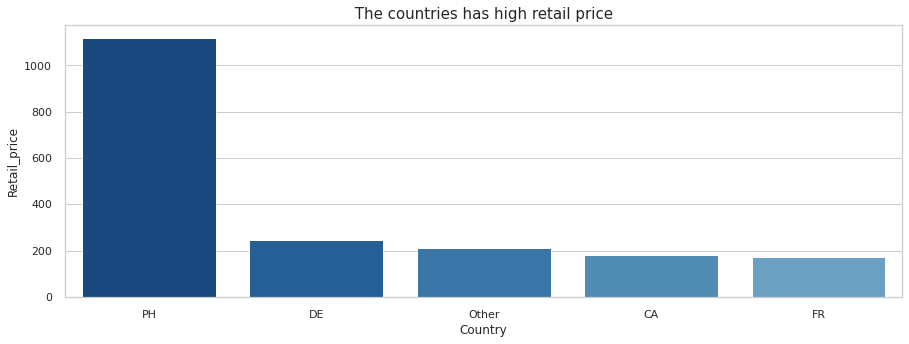

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", n_colors = 10)
palette.reverse()

plt.title(" The countries has high retail price ", fontsize=15)
sns.barplot(data=origin_country_price,  y='retail_price', x= 'origin_country', palette = palette)
plt.ylabel("Retail_price", fontsize=12)
plt.xlabel("Country", fontsize=12)

# Save Dataframe

In [ ]:
summer.shape

(4854, 27)

In [ ]:
summer.to_csv('/content/gdrive/MyDrive/Final Project/EDA_Wish.csv',index= False)

# Export to Google Sheet Report and Design a GDS Dashboard

In [ ]:
# Connect to Google Sheets
!pip uninstall --upgrade oauth2client gspread
!pip install gspread_dataframe


Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --upgrade


In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('final_project')

In [ ]:
# ❗️ Note that before export data, you have to create the empty sheets in the Google Sheet first
def export_data(gsheet_key, worksheet_id, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    worksheet = sh.get_worksheet(worksheet_id)
    set_with_dataframe(worksheet, data)

In [ ]:
export_data('1Fnz_cU7QnuhMwLJXa2cUQmHLYWg-8FRJ7EL7d-gNNQs', 0, unlogic_data)
# export_data('1naL6oX8Eeo6iBMiBcGkB6yknSEK8BNtEqWQoEtwSI3E', 1, tx_country)
# export_data('1naL6oX8Eeo6iBMiBcGkB6yknSEK8BNtEqWQoEtwSI3E', 2, tx_monthly_active)
# export_data('1naL6oX8Eeo6iBMiBcGkB6yknSEK8BNtEqWQoEtwSI3E', 3, tx_user_ratio)
# export_data('1naL6oX8Eeo6iBMiBcGkB6yknSEK8BNtEqWQoEtwSI3E', 4, tx_user_type_revenue)
# export_data('1naL6oX8Eeo6iBMiBcGkB6yknSEK8BNtEqWQoEtwSI3E', 5, tx_retention)

AttributeError: ignored